In [1]:
#import libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [2]:
dframe = pd.read_csv("Project2_CustomerData.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Project2_CustomerData.csv'

In [ ]:
dframe.head()

In [ ]:
%matplotlib inline

In [ ]:
plt.hist(dframe['Annual Income'],color = 'indianred',bins = 20)

In [ ]:
plt.hist(dframe['Spending Score'],color = 'blue',bins = 20)

In [ ]:
from scipy.stats import norm
X = dframe['Spending Score']
plt.plot(X,norm.pdf(X))
plt.show()

In [ ]:
plt.hist(dframe['Annual Income'],color = 'indianred',bins = 20)
plt.hist(dframe['Spending Score'],color = 'blue',bins = 20,alpha = 0.5)

In [ ]:
sns.jointplot(dframe['Annual Income'],dframe['Spending Score'],kind = 'hex')

NameError: name 'dframe' is not defined

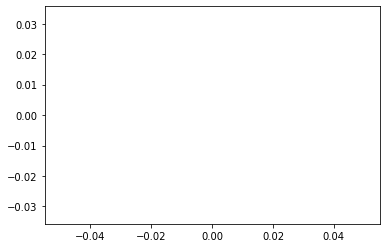

In [3]:
colors = ['cyan','red']
explode = (0.1,0)
plt.axis('equal')
dframe['Gender'].value_counts().plot.pie(colors = colors , explode = explode ,autopct = '%1.1f%%' , startangle = 180,shadow = True)

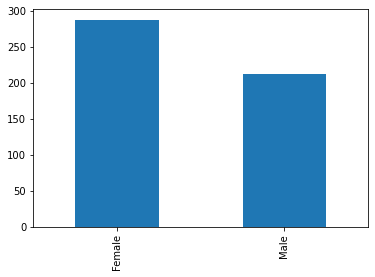

In [93]:
dframe['Gender'].value_counts().plot.bar()

(array([45., 22., 13., 32., 35., 62., 52., 31., 37., 13., 20., 37., 18.,
        18.,  4., 21.,  3.,  7., 20., 10.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ,
        46.6, 49.2, 51.8, 54.4, 57. , 59.6, 62.2, 64.8, 67.4, 70. ]),
 <a list of 20 Patch objects>)

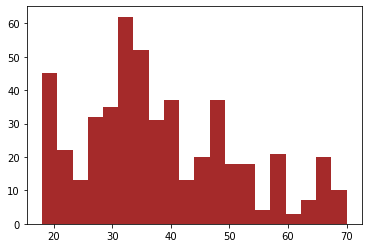

In [116]:
plt.hist(dframe['Age'],color = 'brown',bins = 20)

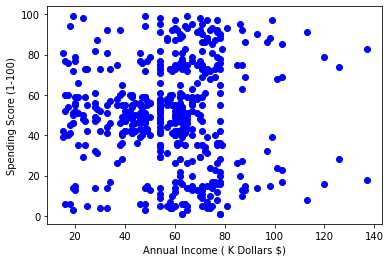

In [95]:
X = dframe[['Annual Income','Spending Score']]
#Visualise data points
plt.scatter(X['Annual Income'],X['Spending Score'],c='blue')
plt.xlabel('Annual Income ( K Dollars $)')
plt.ylabel('Spending Score (1-100)')
plt.show()

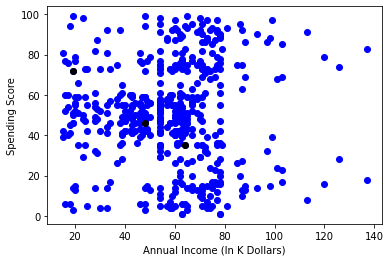

In [96]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#Number of clusters

K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Annual Income"],X["Spending Score"],c='blue')
plt.scatter(Centroids["Annual Income"],Centroids["Spending Score"],c='black')
plt.xlabel('Annual Income (In K Dollars)')
plt.ylabel('Spending Score')
plt.show()

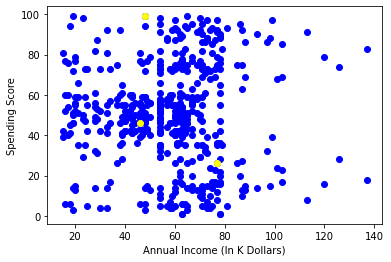

In [97]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#Number of clusters

K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Annual Income"],X["Spending Score"],c='blue')
plt.scatter(Centroids["Annual Income"],Centroids["Spending Score"],c='yellow')
plt.xlabel('Annual Income (In K Dollars)')
plt.ylabel('Spending Score')
plt.show()

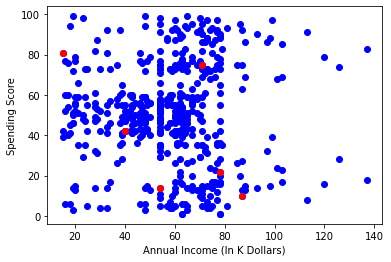

In [98]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#Number of clusters

K=6

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Annual Income"],X["Spending Score"],c='blue')
plt.scatter(Centroids["Annual Income"],Centroids["Spending Score"],c='red')
plt.xlabel('Annual Income (In K Dollars)')
plt.ylabel('Spending Score')
plt.show()

In [99]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income"]-row_d["Annual Income"])**2
            d2=(row_c["Spending Score"]-row_d["Spending Score"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score","Annual Income"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score'] - Centroids['Spending Score']).sum() + (Centroids_new['Annual Income'] - Centroids['Annual Income']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score","Annual Income"]]

<ipython-input-99-f049c4e91779>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


-0.31727614368834445
-4.761913930040704
-2.78668852750522
0.005667290993772056
-0.4367131133910398
-0.3576373926965051
0.2990649983131597
-0.7431874647230678
-1.127699114078741
0.1131038164598408
0.6144072148606412
0.5578995046732871
-0.2338935081503717
-0.3002185084904134
-1.0026492478221556
-0.8571423919048797
-0.04341421252674138
-0.3108591341873055
-0.5880227594874743
-1.606332665863654
-0.5460839327197586
-1.1402329906990847
-1.0415022734001873
-0.7451448244136429
-0.17130098854127596
-0.7349302483992819
-0.6986966646573833
0.0


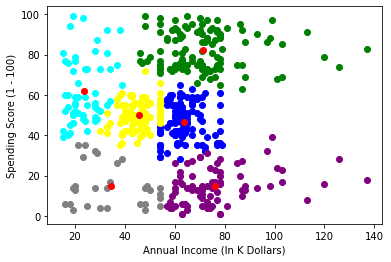

In [100]:
color=['blue','green','cyan','yellow','purple','grey']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income"],data["Spending Score"],c=color[k])
plt.scatter(Centroids["Annual Income"],Centroids["Spending Score"],c='red')
plt.xlabel('Annual Income (In K Dollars)')
plt.ylabel('Spending Score (1 - 100)')
plt.show()

In [101]:
from sklearn.cluster import KMeans

In [102]:
# statistics of the data
dframe.describe()

,CustomerID,Age,Annual Income,Spending Score,Net Quatity,Returned Item Quantity,Purchased Item Quantity
count,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,38.380000,57.77200,50.10800,1.226000,-0.016000,1.242000
std,144.481833,13.114098,20.59272,24.88604,0.481027,0.140654,0.460282
min,1.000000,18.000000,15.00000,1.00000,0.000000,-2.000000,1.000000
25%,125.750000,29.000000,46.00000,35.00000,1.000000,0.000000,1.000000
50%,250.500000,36.000000,60.00000,50.00000,1.000000,0.000000,1.000000
75%,375.250000,47.000000,71.00000,69.50000,1.000000,0.000000,1.000000
max,500.000000,70.000000,137.00000,99.00000,4.000000,0.000000,4.000000


In [103]:
del dframe['Gender']

In [104]:
dframe.head()

,CustomerID,Age,Annual Income,Spending Score,Net Quatity,Returned Item Quantity,Purchased Item Quantity
0,1,19,15,39,2,0,2
1,2,21,15,81,2,0,2
2,3,20,16,6,0,-2,2
3,4,23,16,77,1,0,1
4,5,31,17,40,1,0,1


In [105]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dframe)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-9.059420e-17,-2.053913e-16,4.360956e-16,1.225686e-16,-1.153744e-15,1.768030e-16,5.826450e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.728590e+00,-1.555609e+00,-2.079125e+00,-1.975291e+00,-2.551267e+00,-1.411966e+01,-5.262909e-01
25%,-8.642951e-01,-7.159771e-01,-5.722308e-01,-6.076954e-01,-4.702988e-01,1.138682e-01,-5.262909e-01
50%,0.000000e+00,-1.816658e-01,1.083019e-01,-4.344129e-03,-4.702988e-01,1.138682e-01,-5.262909e-01
75%,8.642951e-01,6.579662e-01,6.430062e-01,7.800125e-01,-4.702988e-01,1.138682e-01,-5.262909e-01
max,1.728590e+00,2.413560e+00,3.851232e+00,1.966603e+00,5.772606e+00,1.138682e-01,5.997977e+00


In [106]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(dframe)

KMeans(n_clusters=2)

In [107]:
# inertia on the fitted data
kmeans.inertia_

3209367.6400000006

/home/basilisk/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/basilisk/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/basilisk/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/basilisk/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

Text(0, 0.5, 'Inertia')

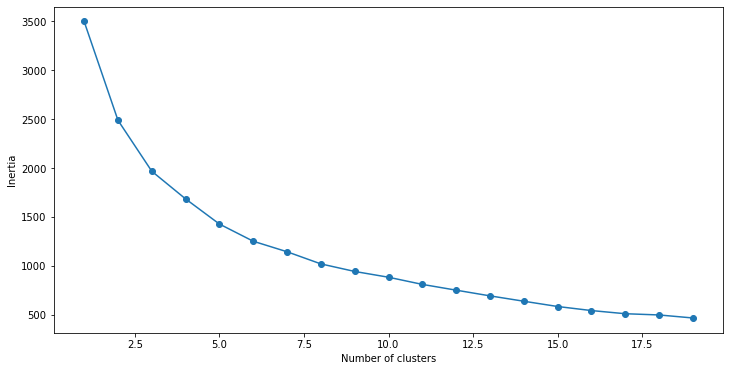

In [108]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [109]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

/home/basilisk/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [110]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    115
4    114
0    104
1    103
2     57
5      7
Name: cluster, dtype: int64

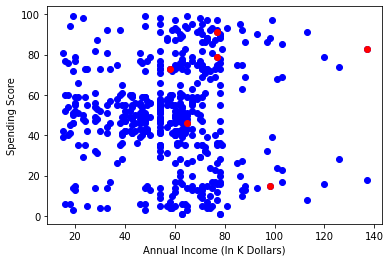

In [111]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#Number of clusters

K=6

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Annual Income"],X["Spending Score"],c='blue')
plt.scatter(Centroids["Annual Income"],Centroids["Spending Score"],c='red')
plt.xlabel('Annual Income (In K Dollars)')
plt.ylabel('Spending Score')
plt.show()

In [112]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income"]-row_d["Annual Income"])**2
            d2=(row_c["Spending Score"]-row_d["Spending Score"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score","Annual Income"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score'] - Centroids['Spending Score']).sum() + (Centroids_new['Annual Income'] - Centroids['Annual Income']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score","Annual Income"]]

-36.954365968835305
-24.772687377986422
-9.61278598599094
-3.2092877673870888
-0.9314500978343929
-4.063779495549067
-4.6637127024201455
-4.298440767838642
-1.8784180093513498
-5.145679408461859
-6.220803888325914
-8.975961059054203
-7.942323416612659
-3.8339501418555635
-4.6970828944558995
-2.639830638101289
-1.5565297724957965
-2.143929292023879
-4.473352481452302
-3.099093071949703
-2.231032151119347
-3.697586808774652
-1.4871260169647265
-3.2252175386624096
-4.084945513676793
-3.0848013789395274
-0.26691476165160566
-0.3232276155680438
0.0


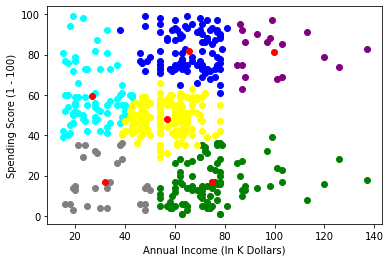

In [114]:
color=['blue','green','cyan','yellow','purple','grey']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income"],data["Spending Score"],c=color[k])
plt.scatter(Centroids["Annual Income"],Centroids["Spending Score"],c='red')
plt.xlabel('Annual Income (In K Dollars)')
plt.ylabel('Spending Score (1 - 100)')
plt.show()